<a href="https://colab.research.google.com/github/achong2001/BestState/blob/main/AML_HW5_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied Machine Learning Homework 5**
**Due 02 Dec 2023 (Tuesday) 11:59PM EST**

Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).

2) Please include your Name and UNI below.

## Name : Allan Chong

## UNI : ac5439

## Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0
y_dev = to_categorical(y_dev, 10)
y_test = to_categorical(y_test, 10)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:
1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [3]:
#Your code here
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

3.2 Report the model summary

In [4]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

###3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [5]:
#Your code here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
1250/1250 [==============================] - 59s 45ms/step - loss: 1.6489 - accuracy: 0.3892 - val_loss: 1.4205 - val_accuracy: 0.4817
Epoch 2/20
1250/1250 [==============================] - 49s 39ms/step - loss: 1.3639 - accuracy: 0.5063 - val_loss: 1.3530 - val_accuracy: 0.5173
Epoch 3/20
1250/1250 [==============================] - 51s 40ms/step - loss: 1.2333 - accuracy: 0.5573 - val_loss: 1.2573 - val_accuracy: 0.5586
Epoch 4/20
1250/1250 [==============================] - 48s 38ms/step - loss: 1.1382 - accuracy: 0.5944 - val_loss: 1.2022 - val_accuracy: 0.5746
Epoch 5/20
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0589 - accuracy: 0.6247 - val_loss: 1.1654 - val_accuracy: 0.5959
Epoch 6/20
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9936 - accuracy: 0.6468 - val_loss: 1.0720 - val_accuracy: 0.6246
Epoch 7/20
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9441 - accuracy: 0.6656 - val_loss: 1.0310 -

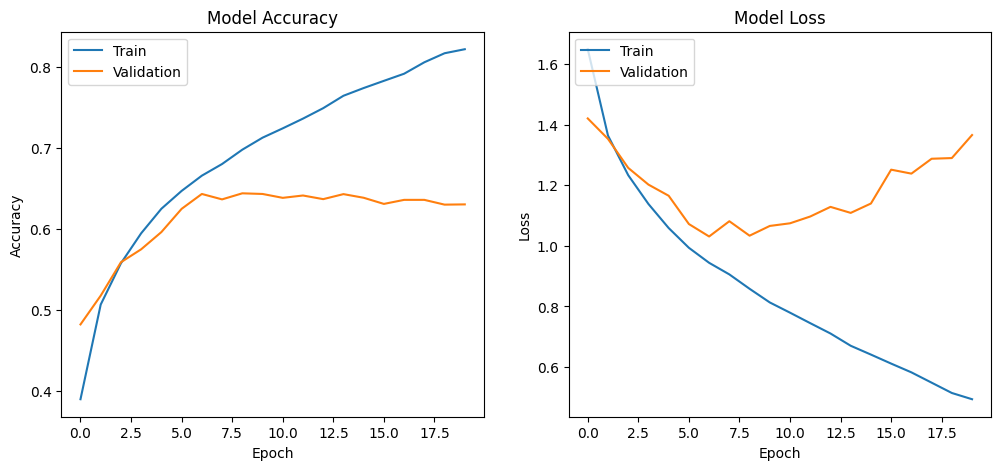

In [6]:
# #Your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [7]:
#Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

313/313 [==============================] - 6s 18ms/step - loss: 1.3720 - accuracy: 0.6265
Test Accuracy: 0.63
Test Loss: 1.37


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

3.4.1 Dropout

In [8]:
#Your code here
model_dropout = Sequential()
model_dropout.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_dropout.add(Dropout(0.3))
model_dropout.add(MaxPool2D(pool_size=(2, 2)))
model_dropout.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(MaxPool2D(pool_size=(2, 2)))
model_dropout.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Flatten())
model_dropout.add(Dense(84, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(10, activation='softmax'))

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
1250/1250 [==============================] - 59s 46ms/step - loss: 1.7135 - accuracy: 0.3715 - val_loss: 1.5287 - val_accuracy: 0.4837
Epoch 2/20
1250/1250 [==============================] - 55s 44ms/step - loss: 1.4563 - accuracy: 0.4753 - val_loss: 1.5284 - val_accuracy: 0.4851
Epoch 3/20
1250/1250 [==============================] - 57s 45ms/step - loss: 1.3525 - accuracy: 0.5200 - val_loss: 1.4171 - val_accuracy: 0.5165
Epoch 4/20
1250/1250 [==============================] - 56s 45ms/step - loss: 1.2833 - accuracy: 0.5468 - val_loss: 1.2842 - val_accuracy: 0.5415
Epoch 5/20
1250/1250 [==============================] - 62s 49ms/step - loss: 1.2307 - accuracy: 0.5626 - val_loss: 1.2680 - val_accuracy: 0.5697
Epoch 6/20
1250/1250 [==============================] - 58s 47ms/step - loss: 1.1848 - accuracy: 0.5815 - val_loss: 1.2483 - val_accuracy: 0.5674
Epoch 7/20
1250/1250 [==============================] - 56s 45ms/step - loss: 1.1590 - accuracy: 0.5913 - val_loss: 1.2682 -

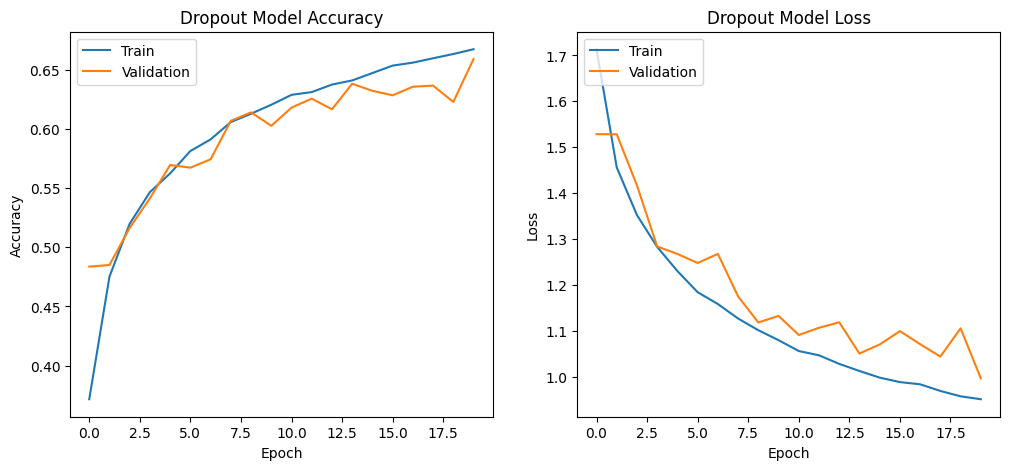

In [9]:
#Your code here
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Dropout Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Dropout Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [10]:
#Your code here
test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(x_test, y_test)
print(f"Dropout Test Accuracy: {test_accuracy_dropout:.2f}")
print(f"Dropout Test Loss: {test_loss_dropout:.2f}")

313/313 [==============================] - 6s 19ms/step - loss: 1.0038 - accuracy: 0.6522
Dropout Test Accuracy: 0.65
Dropout Test Loss: 1.00


3.4.2 Batch Normalisation

In [11]:
#Your code here
model_batch = Sequential()
model_batch.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_batch.add(BatchNormalization())
model_batch.add(MaxPool2D(pool_size=(2, 2)))
model_batch.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_batch.add(BatchNormalization())
model_batch.add(MaxPool2D(pool_size=(2, 2)))
model_batch.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
model_batch.add(BatchNormalization())
model_batch.add(Flatten())
model_batch.add(Dense(84, activation='relu'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(10, activation='softmax'))

model_batch.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
history_batch = model_batch.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1, batch_size=128)

Epoch 1/20
313/313 [==============================] - 56s 172ms/step - loss: 1.5540 - accuracy: 0.4487 - val_loss: 1.6034 - val_accuracy: 0.4155
Epoch 2/20
313/313 [==============================] - 50s 161ms/step - loss: 1.2198 - accuracy: 0.5667 - val_loss: 1.2901 - val_accuracy: 0.5420
Epoch 3/20
313/313 [==============================] - 52s 167ms/step - loss: 1.0801 - accuracy: 0.6171 - val_loss: 1.1386 - val_accuracy: 0.6015
Epoch 4/20
313/313 [==============================] - 51s 163ms/step - loss: 0.9772 - accuracy: 0.6540 - val_loss: 1.1529 - val_accuracy: 0.5964
Epoch 5/20
313/313 [==============================] - 52s 167ms/step - loss: 0.8885 - accuracy: 0.6878 - val_loss: 1.1439 - val_accuracy: 0.6070
Epoch 6/20
313/313 [==============================] - 52s 168ms/step - loss: 0.8088 - accuracy: 0.7174 - val_loss: 1.1033 - val_accuracy: 0.6229
Epoch 7/20
313/313 [==============================] - 54s 173ms/step - loss: 0.7440 - accuracy: 0.7395 - val_loss: 1.3147 - val_ac

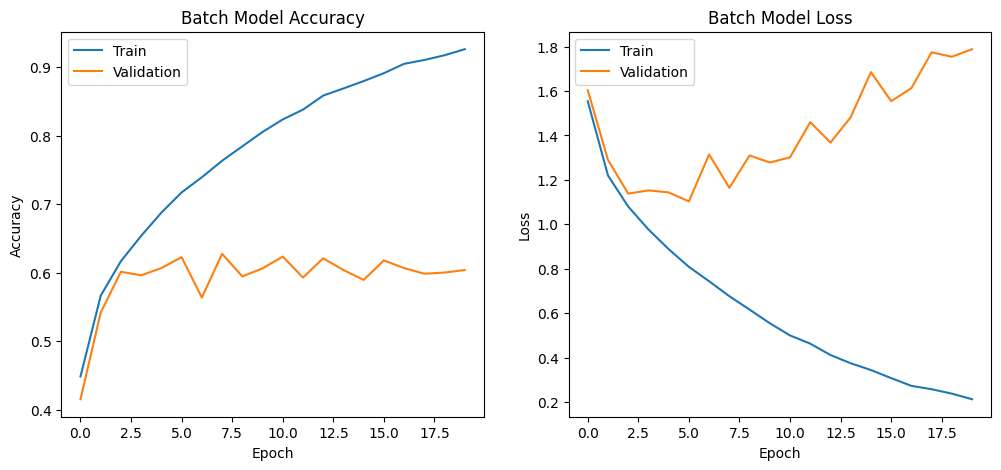

In [12]:
#Your code here
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_batch.history['accuracy'])
plt.plot(history_batch.history['val_accuracy'])
plt.title('Batch Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_batch.history['loss'])
plt.plot(history_batch.history['val_loss'])
plt.title('Batch Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
#Your code here
test_loss_batch, test_accuracy_batch = model_batch.evaluate(x_test, y_test)
print(f"Batch Test Accuracy: {test_accuracy_batch:.2f}")
print(f"Batch Test Loss: {test_loss_batch:.2f}")

313/313 [==============================] - 6s 21ms/step - loss: 1.8161 - accuracy: 0.6010
Batch Test Accuracy: 0.60
Batch Test Loss: 1.82


3.4.3 Dropout method works best with overfitting because the validation curve is much more aligned with the training curve than the other two methods. Batch also does not seem to help with overfitting directly because it just involves normalizing the inputs.

## Natural Language Processing

We will train a supervised learning model to predict if a movie review has a positive or negative sentiment.

###**Dataset loading & dev/test splits**

1.1) Load the movie reviews dataset from NLTK library

In [14]:
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import movie_reviews
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.2) Load the positive & negative reviews

In [15]:
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.raw(fileid)
    positive_reviews.append(words)

negative_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.raw(fileid)
    negative_reviews.append(words)

1.3) Make a data frame that has all reviews and their corresponding labels

In [16]:
# Your code here
pos_reviews_df = pd.DataFrame({'Reviews': positive_reviews})
pos_reviews_df['Sentiment'] = [1]*len(positive_reviews)
neg_reviews_df = pd.DataFrame({'Reviews': negative_reviews})
neg_reviews_df['Sentiment'] = [0]*len(negative_reviews)

rev_df = pos_reviews_df.append(neg_reviews_df, ignore_index=True)

1.4) Look at the class distribution of the movie reviews

In [17]:
# Your code here
print("Number of Positive Reviews: ", len(rev_df[rev_df["Sentiment"] == 1]))
print("Number of Negative Reviews: ", len(rev_df[rev_df["Sentiment"] == 0]))

Number of Positive Reviews:  1000
Number of Negative Reviews:  1000


1.5) Create a development & test split (80/20 ratio):

In [18]:
# Your code here
dev_X, test_X, dev_y, test_y = train_test_split(rev_df["Reviews"], rev_df["Sentiment"], test_size=.2, random_state=42)

## **Data preprocessing**

We will do some data preprocessing before we tokenize the data. You can use the re package in python to remove and and replace these strings.

1.6) Replace numbers in every review with ""

In [19]:
# Your code here
dev_X = [re.sub(r'\d+', '', text) for text in dev_X]
test_X = [re.sub(r'\d+', '', text) for text in test_X]

1.7) Remove all stop words

In [20]:
# Your code here
def remove_words(text):
  vector_stop_words = CountVectorizer(stop_words='english')
  X = vector_stop_words.fit_transform([text])
  filtered_text = vector_stop_words.get_feature_names_out()
  return ' '.join(filtered_text)

dev_X = [remove_words(text) for text in dev_X]
test_X = [remove_words(text) for text in test_X]

1.8) Remove all punctuations

In [21]:
# Your code here
dev_X = [re.sub(r'[^\w\s]', '', text) for text in dev_X]
test_X = [re.sub(r'[^\w\s]', '', text) for text in test_X]

1.9) Apply stemming on the development & test datasets using Porter algorithm

In [22]:
# Your code here
porter = PorterStemmer()
def stemSentence(sentence):
  token_words = word_tokenize(sentence)
  stem_sentence = [porter.stem(word) for word in token_words]
  return ' '.join(stem_sentence)

dev_X = [stemSentence(text) for text in dev_X]
test_X = [stemSentence(text) for text in test_X]

1.10) Looking at the dataset do you think any other data pre-processing might be helpful? You can experiment with the features if you want to. Lemmatization may be helpful since they offer a more meaningful base form than stemming.

### 2) Model Training

2.1) Create bag of words features for each review in the development dataset

In [23]:
# Your code here
bow = CountVectorizer()
bow_dev_X = bow.fit_transform(dev_X)

2.2) Train a Logistic Regression model on the development dataset

In [24]:
# Your code here
lr = LogisticRegression().fit(bow_dev_X, dev_y)

2.3) Create TF-IDF features for each review in the development dataset

In [25]:
# Your code here
tf = TfidfVectorizer()
tf_dev_X = tf.fit_transform(dev_X)

2.4) Train the Logistic Regression model on the development dataset with TF-IDF features

In [26]:
# Your code here
tf_lr = LogisticRegression().fit(tf_dev_X, dev_y)

2.5) Compare the performance of the two models on the test dataset using a classication
report and the scores obtained. Explain the difference in results obtained.

In [28]:
# Your code here
bow_test_X = bow.transform(test_X)
tf_test_X = tf.transform(test_X)

pred_y_bow = lr.predict(bow_test_X)
pred_y_tf = tf_lr.predict(tf_test_X)

report_bow = classification_report(test_y, pred_y_bow)
report_tf = classification_report(test_y, pred_y_tf)

print("BOW Classification Report: \n", report_bow)
print("TF-IDF Classification Report: \n", report_tf)

BOW Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       201
           1       0.79      0.83      0.81       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

TF-IDF Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       201
           1       0.82      0.83      0.83       199

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.82      0.82       400



The TF-IDF Classification seems to perform better than Bagging of Words. The overall accuracy is slightly better, and the precision and recall are slightly better.